<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [4]:
df = pd.read_csv('supermarket_sales.csv')

In [5]:
df.head()


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Date column should by Date/Time

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date']

0      2019-01-05
1      2019-03-08
2      2019-03-03
3      2019-01-27
4      2019-02-08
          ...    
998    2019-02-22
999    2019-02-18
1000   2019-02-18
1001   2019-03-10
1002   2019-01-26
Name: Date, Length: 1003, dtype: datetime64[ns]

In [7]:
df.set_index('Date',inplace=True)

In [8]:
df.describe()

Unit price    Quantity       Tax 5%        Total         cogs  \
count  996.000000  983.000000  1003.000000  1003.000000  1003.000000   
mean    55.764568    5.501526    15.400368   323.407726   308.007358   
std     26.510165    2.924673    11.715192   246.019028   234.303836   
min     10.080000    1.000000     0.508500    10.678500    10.170000   
25%     33.125000    3.000000     5.894750   123.789750   117.895000   
50%     55.420000    5.000000    12.096000   254.016000   241.920000   
75%     78.085000    8.000000    22.539500   473.329500   450.790000   
max     99.960000   10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count              1003.000000   1003.000000  1003.000000  
mean                  4.761905     15.400368     6.972682  
std                   0.000000     11.715192     1.717647  
min                   4.761905      0.508500     4.000000  
25%                   4.761905      5.894750     5.500000  
50%                   4.761905     12.096000     7.000000  
75%                   4.761905     22.539500     8.500000  
max                   4.761905     49.650000    10.000000

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

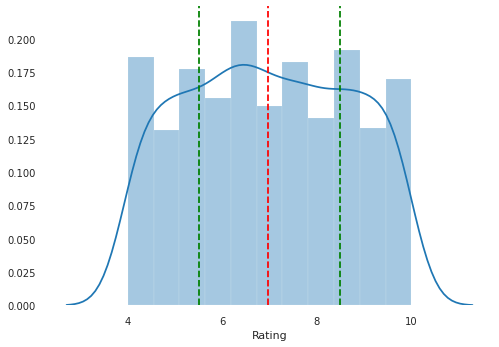

In [15]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25,75 th percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green',ls='--')

(1)Used numpy to calculate the mean which is represented as a red vertical line on the graph(2) Used numpy to calculate the percentile 25and 75 which is represented as a dashed green line.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

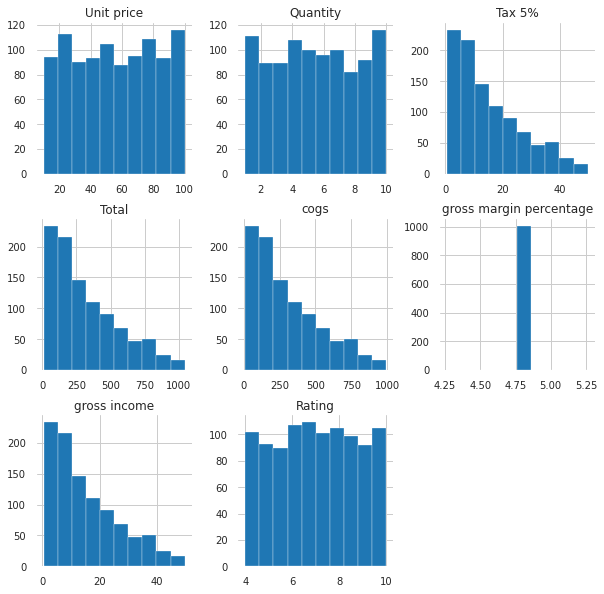

In [19]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

<AxesSubplot:xlabel='Branch', ylabel='count'>

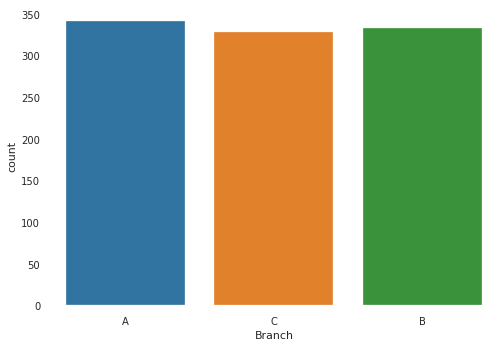

In [20]:
sns.countplot(df['Branch'])

In [21]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

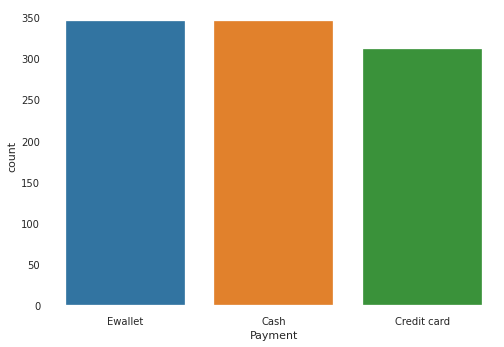

In [23]:
sns.countplot(df['Payment'])

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

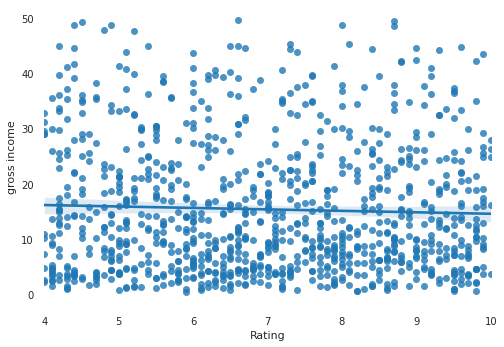

In [24]:
sns.regplot(df['Rating'],df['gross income'])

Let´s check if different branches shows different avg groos income.To do that, I use boxplot in seaborn

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

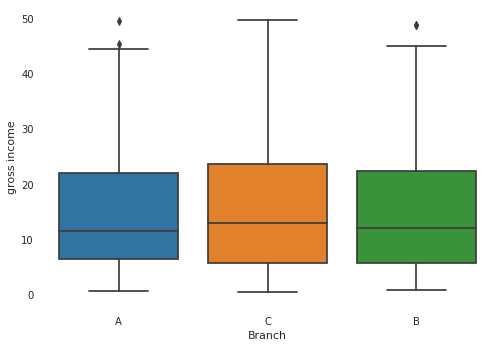

In [26]:
sns.boxplot(x=df['Branch'],y=df['gross income'])

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

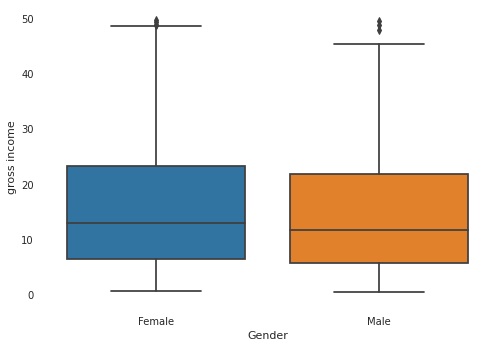

In [27]:
sns.boxplot(x=df['Gender'],y=df['gross income'])

Pretty similar but womens spends slightly more

Theres does not seem to be significances differences

**Question 4:** Is there a noticeable time trend in gross income?

There are repeated values for a date. So,in order to to be able to lineplot gross income, date values are grouped by the mean for having unique values for a particular day

In [30]:
df.groupby(df.index).mean()

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                               
1/1/19    54.995833  6.454545  18.830083  395.431750  376.601667   
1/10/19   58.051111  6.111111  18.841000  395.661000  376.820000   
1/11/19   59.962500  5.000000  12.589063  264.370313  251.781250   
1/12/19   56.900000  7.272727  22.444864  471.342136  448.897273   
1/13/19   53.150000  4.777778  11.672400  245.120400  233.448000   
...             ...       ...        ...         ...         ...   
3/5/19    58.235882  6.058824  17.453441  366.522265  349.068824   
3/6/19    51.197273  6.222222  13.387864  281.145136  267.757273   
3/7/19    47.862222  4.111111   7.609833  159.806500  152.196667   
3/8/19    49.263636  5.454545  13.529818  284.126182  270.596364   
3/9/19    67.346250  6.187500  22.244187  467.127938  444.883750   

         gross margin percentage  gross income    Rating  
Date                                                      
1/1/19                  4.761905     18.830083  6.583333  
1/10/19                 4.761905     18.841000  6.066667  
1/11/19                 4.761905     12.589063  7.100000  
1/12/19                 4.761905     22.444864  6.845455  
1/13/19                 4.761905     11.672400  6.720000  
...                          ...           ...       ...  
3/5/19                  4.761905     17.453441  6.723529  
3/6/19                  4.761905     13.387864  7.209091  
3/7/19                  4.761905      7.609833  6.988889  
3/8/19                  4.761905     13.529818  7.618182  
3/9/19                  4.761905     22.244187  7.281250  

[89 rows x 8 columns]

In [32]:
df.groupby(df.index).mean().index

Index(['1/1/19', '1/10/19', '1/11/19', '1/12/19', '1/13/19', '1/14/19',
       '1/15/19', '1/16/19', '1/17/19', '1/18/19', '1/19/19', '1/2/19',
       '1/20/19', '1/21/19', '1/22/19', '1/23/19', '1/24/19', '1/25/19',
       '1/26/19', '1/27/19', '1/28/19', '1/29/19', '1/3/19', '1/30/19',
       '1/31/19', '1/4/19', '1/5/19', '1/6/19', '1/7/19', '1/8/19', '1/9/19',
       '2/1/19', '2/10/19', '2/11/19', '2/12/19', '2/13/19', '2/14/19',
       '2/15/19', '2/16/19', '2/17/19', '2/18/19', '2/19/19', '2/2/19',
       '2/20/19', '2/21/19', '2/22/19', '2/23/19', '2/24/19', '2/25/19',
       '2/26/19', '2/27/19', '2/28/19', '2/3/19', '2/4/19', '2/5/19', '2/6/19',
       '2/7/19', '2/8/19', '2/9/19', '3/1/19', '3/10/19', '3/11/19', '3/12/19',
       '3/13/19', '3/14/19', '3/15/19', '3/16/19', '3/17/19', '3/18/19',
       '3/19/19', '3/2/19', '3/20/19', '3/21/19', '3/22/19', '3/23/19',
       '3/24/19', '3/25/19', '3/26/19', '3/27/19', '3/28/19', '3/29/19',
       '3/3/19', '3/30/19', '3/4/19', 

<AxesSubplot:xlabel='Date', ylabel='gross income'>

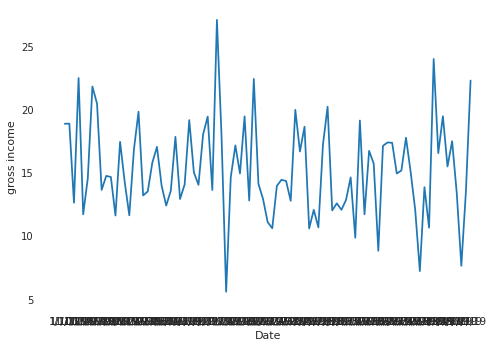

In [36]:
sns.lineplot(x= df.groupby(df.index).mean().index,
             y= df.groupby(df.index).mean()['gross income'])

It does not seems to be any particular trend 

### Task 4: Dealing With Duplicate Rows and Missing Values

In [38]:
df.duplicated().sum()

3

In [39]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                          
2/18/19  849-09-3807      A    Yangon        Member  Female   
3/10/19  745-74-0715      A    Yangon        Normal    Male   
1/26/19  452-04-8808      B  Mandalay        Normal    Male   

                   Product line  Unit price  Quantity  Tax 5%    Total   Time  \
Date                                                                            
2/18/19     Fashion accessories       88.34       7.0  30.919  649.299  13:28   
3/10/19  Electronic accessories         NaN       2.0   5.803  121.863  20:46   
1/26/19  Electronic accessories       87.08       NaN  30.478  640.038  15:17   

         Payment    cogs  gross margin percentage  gross income  Rating  
Date                                                                     
2/18/19     Cash  618.38                 4.761905        30.919     6.6  
3/10/19  Ewallet  116.06                 4.761905         5.803     8.8  
1/26/19     Cash  609.56                 4.761905        30.478     5.5

In [41]:
df.drop_duplicates(inplace=True)

In [43]:
df.isna().sum()/len(df)


Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

7.9% of the customer type values are missing. Lets have a look at the heatmap 

<AxesSubplot:ylabel='Date'>

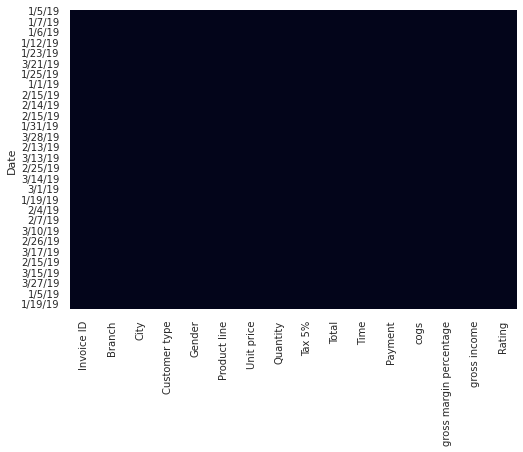

In [53]:
sns.heatmap(df.isnull(),cbar=False)

Dealing with missing data: Filling with 0 or mean ?¿

In [49]:
df.fillna(df.mean(),inplace=True)

only missing column with numerical values are filled. Hence,as an example categorical data is still na 

In [54]:
df.fillna(df.mode().iloc[0],inplace=True)

By running again the heatmap, now there is not missing values. Perfect¡¡

lets check the profile of the dataset:

In [56]:
dataset= pd.read_csv('supermarket_sales.csv')
prof= ProfileReport(dataset)
prof


### Task 5: Correlation Analysis

In [58]:
round(np.corrcoef(df['gross income'],df['Rating'])[1][0],2)

-0.04

In [60]:
round(df.corr(),2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage       -0.00     -0.00    0.00   0.00  0.00   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                  -0.0          0.63   -0.01  
Quantity                                    -0.0          0.70   -0.02  
Tax 5%                                       0.0          1.00   -0.04  
Total                                        0.0          1.00   -0.04  
cogs                                         0.0          1.00   -0.04  
gross margin percentage                      1.0          0.00    0.00  
gross income                                 0.0          1.00   -0.04  
Rating                                       0.0         -0.04    1.00

<AxesSubplot:>

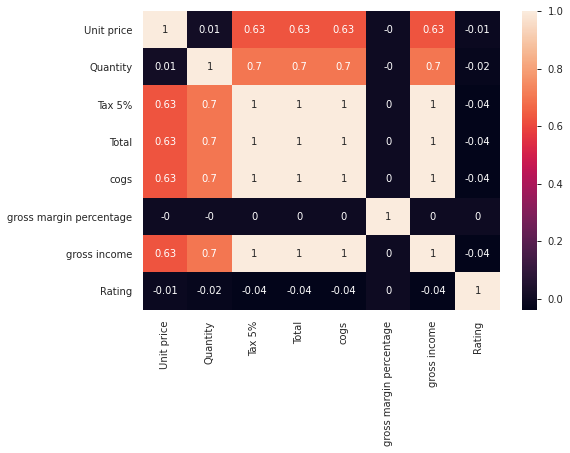

In [62]:
sns.heatmap(round(df.corr(),2),annot=True)

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/